In [1]:
from selenium import webdriver
import time
import chromedriver_binary
from bs4 import BeautifulSoup
from collections import defaultdict
import random
import pickle
import pandas as pd
import numpy as np
import json
import datetime
import seaborn as sns

In [2]:
# To load dateframe from pickle
with open('dateframe_pickle', 'rb') as file:
    df = pickle.load(file)

In [4]:
df.head(1)

,adjpaidoccupancy,occupancydatetime,parkingspacecnt,availableparkingspace
0,0,2018-01-02 08:00:00,5,5


In [7]:
# To load scraped temperture
with open('temp_pickle', 'rb') as file:
    temp_col = pickle.load(file)

In [8]:
temp_col

{'2018/01/02': {'high': 43.9, 'low': 38.3, 'avg': 40.3, 'prep': 0.0},
 '2018/01/03': {'high': 48.6, 'low': 38.5, 'avg': 42.5, 'prep': 0.0},
 '2018/01/04': {'high': 47.1, 'low': 39.6, 'avg': 42.8, 'prep': 0.0},
 '2018/01/05': {'high': 51.3, 'low': 45.3, 'avg': 47.2, 'prep': 0.0},
 '2018/01/06': {'high': 50.9, 'low': 44.2, 'avg': 47.3, 'prep': 0.0},
 '2018/01/08': {'high': 48.0, 'low': 45.1, 'avg': 46.2, 'prep': 0.0},
 '2018/01/09': {'high': 48.6, 'low': 45.0, 'avg': 46.7, 'prep': 0.0},
 '2018/01/10': {'high': 45.9, 'low': 43.2, 'avg': 44.4, 'prep': 0.0},
 '2018/01/11': {'high': 50.7, 'low': 42.8, 'avg': 45.2, 'prep': 0.0},
 '2018/01/12': {'high': 52.2, 'low': 49.6, 'avg': 50.9, 'prep': 0.0},
 '2018/01/13': {'high': 58.1, 'low': 49.3, 'avg': 50.7, 'prep': 0.0},
 '2018/01/16': {'high': 60.8, 'low': 49.6, 'avg': 53.5, 'prep': 0.0},
 '2018/01/17': {'high': 54.9, 'low': 47.1, 'avg': 49.8, 'prep': 0.0},
 '2018/01/18': {'high': 53.4, 'low': 43.2, 'avg': 49.0, 'prep': 0.0},
 '2018/01/19': {'hig

In [17]:
df[['occupancydatetime', 'availableparkingspace']].sample(n=20).head()

,occupancydatetime,availableparkingspace
78792,2018-05-11 13:12:00,1
185835,2018-11-05 09:15:00,3
311767,2019-06-06 08:12:00,3
119983,2018-07-19 15:43:00,0
52492,2018-03-29 18:52:00,1


In [12]:
for i in ['high', 'low', 'avg', 'prep']:
    df[i] = df['occupancydatetime'].map(lambda x: temp_col[x.strftime("%Y/%m/%d")][i])

In [16]:
df.sample(5).head()

,adjpaidoccupancy,occupancydatetime,parkingspacecnt,availableparkingspace,high,low,avg,prep
229134,0,2019-01-18 10:59:00,5,5,55.9,44.1,49.8,0.06
183555,2,2018-10-31 19:15:00,5,3,59.0,45.0,53.3,0.04
200829,2,2018-11-30 19:09:00,5,3,51.1,42.1,47.2,0.00
129618,0,2018-08-04 08:18:00,5,5,79.0,59.0,66.4,0.00
317336,2,2019-06-14 17:01:00,5,3,80.1,57.0,63.0,0.00


In [18]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


/Users/panherbert/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
df.dtypes

adjpaidoccupancy                  int64
occupancydatetime        datetime64[ns]
parkingspacecnt                   int64
availableparkingspace             int64
high                            float64
low                             float64
avg                             float64
prep                            float64
dtype: object

In [22]:
small_df = df.loc[:, ['occupancydatetime', 'availableparkingspace', 'high', 'low', 'avg', 'prep']]

In [23]:
small_df.head()

,occupancydatetime,availableparkingspace,high,low,avg,prep
0,2018-01-02 08:00:00,5,43.9,38.3,40.3,0.0
1,2018-01-02 08:01:00,5,43.9,38.3,40.3,0.0
2,2018-01-02 08:02:00,5,43.9,38.3,40.3,0.0
3,2018-01-02 08:03:00,5,43.9,38.3,40.3,0.0
4,2018-01-02 08:04:00,5,43.9,38.3,40.3,0.0


In [27]:
pd.dzsmall_df.occupancydatetime

AttributeError: module 'pandas' has no attribute 'dzsmall_df'

In [28]:
x = small_df.occupancydatetime.values
y = small_df.availableparkingspace.values

In [29]:
# test = small_df.groupby(small_df, as_index=False).mean()
# test.head(1)

,prep,availableparkingspace,high,low,avg
0,0.0,2.105016,64.614437,46.764128,54.877409


In [65]:
small_df['day'] = small_df['occupancydatetime'].dt.dayofweek

In [67]:
test2 = small_df.groupby(small_df.occupancydatetime.dt.date).mean()
test2.head()


,availableparkingspace,high,low,avg,prep,day
occupancydatetime,,,,,,
2018-01-02,2.273611,43.9,38.3,40.3,0.0,1.0
2018-01-03,1.512500,48.6,38.5,42.5,0.0,2.0
2018-01-04,2.580556,47.1,39.6,42.8,0.0,3.0
2018-01-05,2.215278,51.3,45.3,47.2,0.0,4.0
2018-01-06,1.520833,50.9,44.2,47.3,0.0,5.0


In [60]:
test2['day'] = small_df['occupancydatetime'].dt.dayofweek

In [68]:
test2.dtypes

availableparkingspace    float64
high                     float64
low                      float64
avg                      float64
prep                     float64
day                      float64
dtype: object

In [69]:
test2.head()

,availableparkingspace,high,low,avg,prep,day
occupancydatetime,,,,,,
2018-01-02,2.273611,43.9,38.3,40.3,0.0,1.0
2018-01-03,1.512500,48.6,38.5,42.5,0.0,2.0
2018-01-04,2.580556,47.1,39.6,42.8,0.0,3.0
2018-01-05,2.215278,51.3,45.3,47.2,0.0,4.0
2018-01-06,1.520833,50.9,44.2,47.3,0.0,5.0


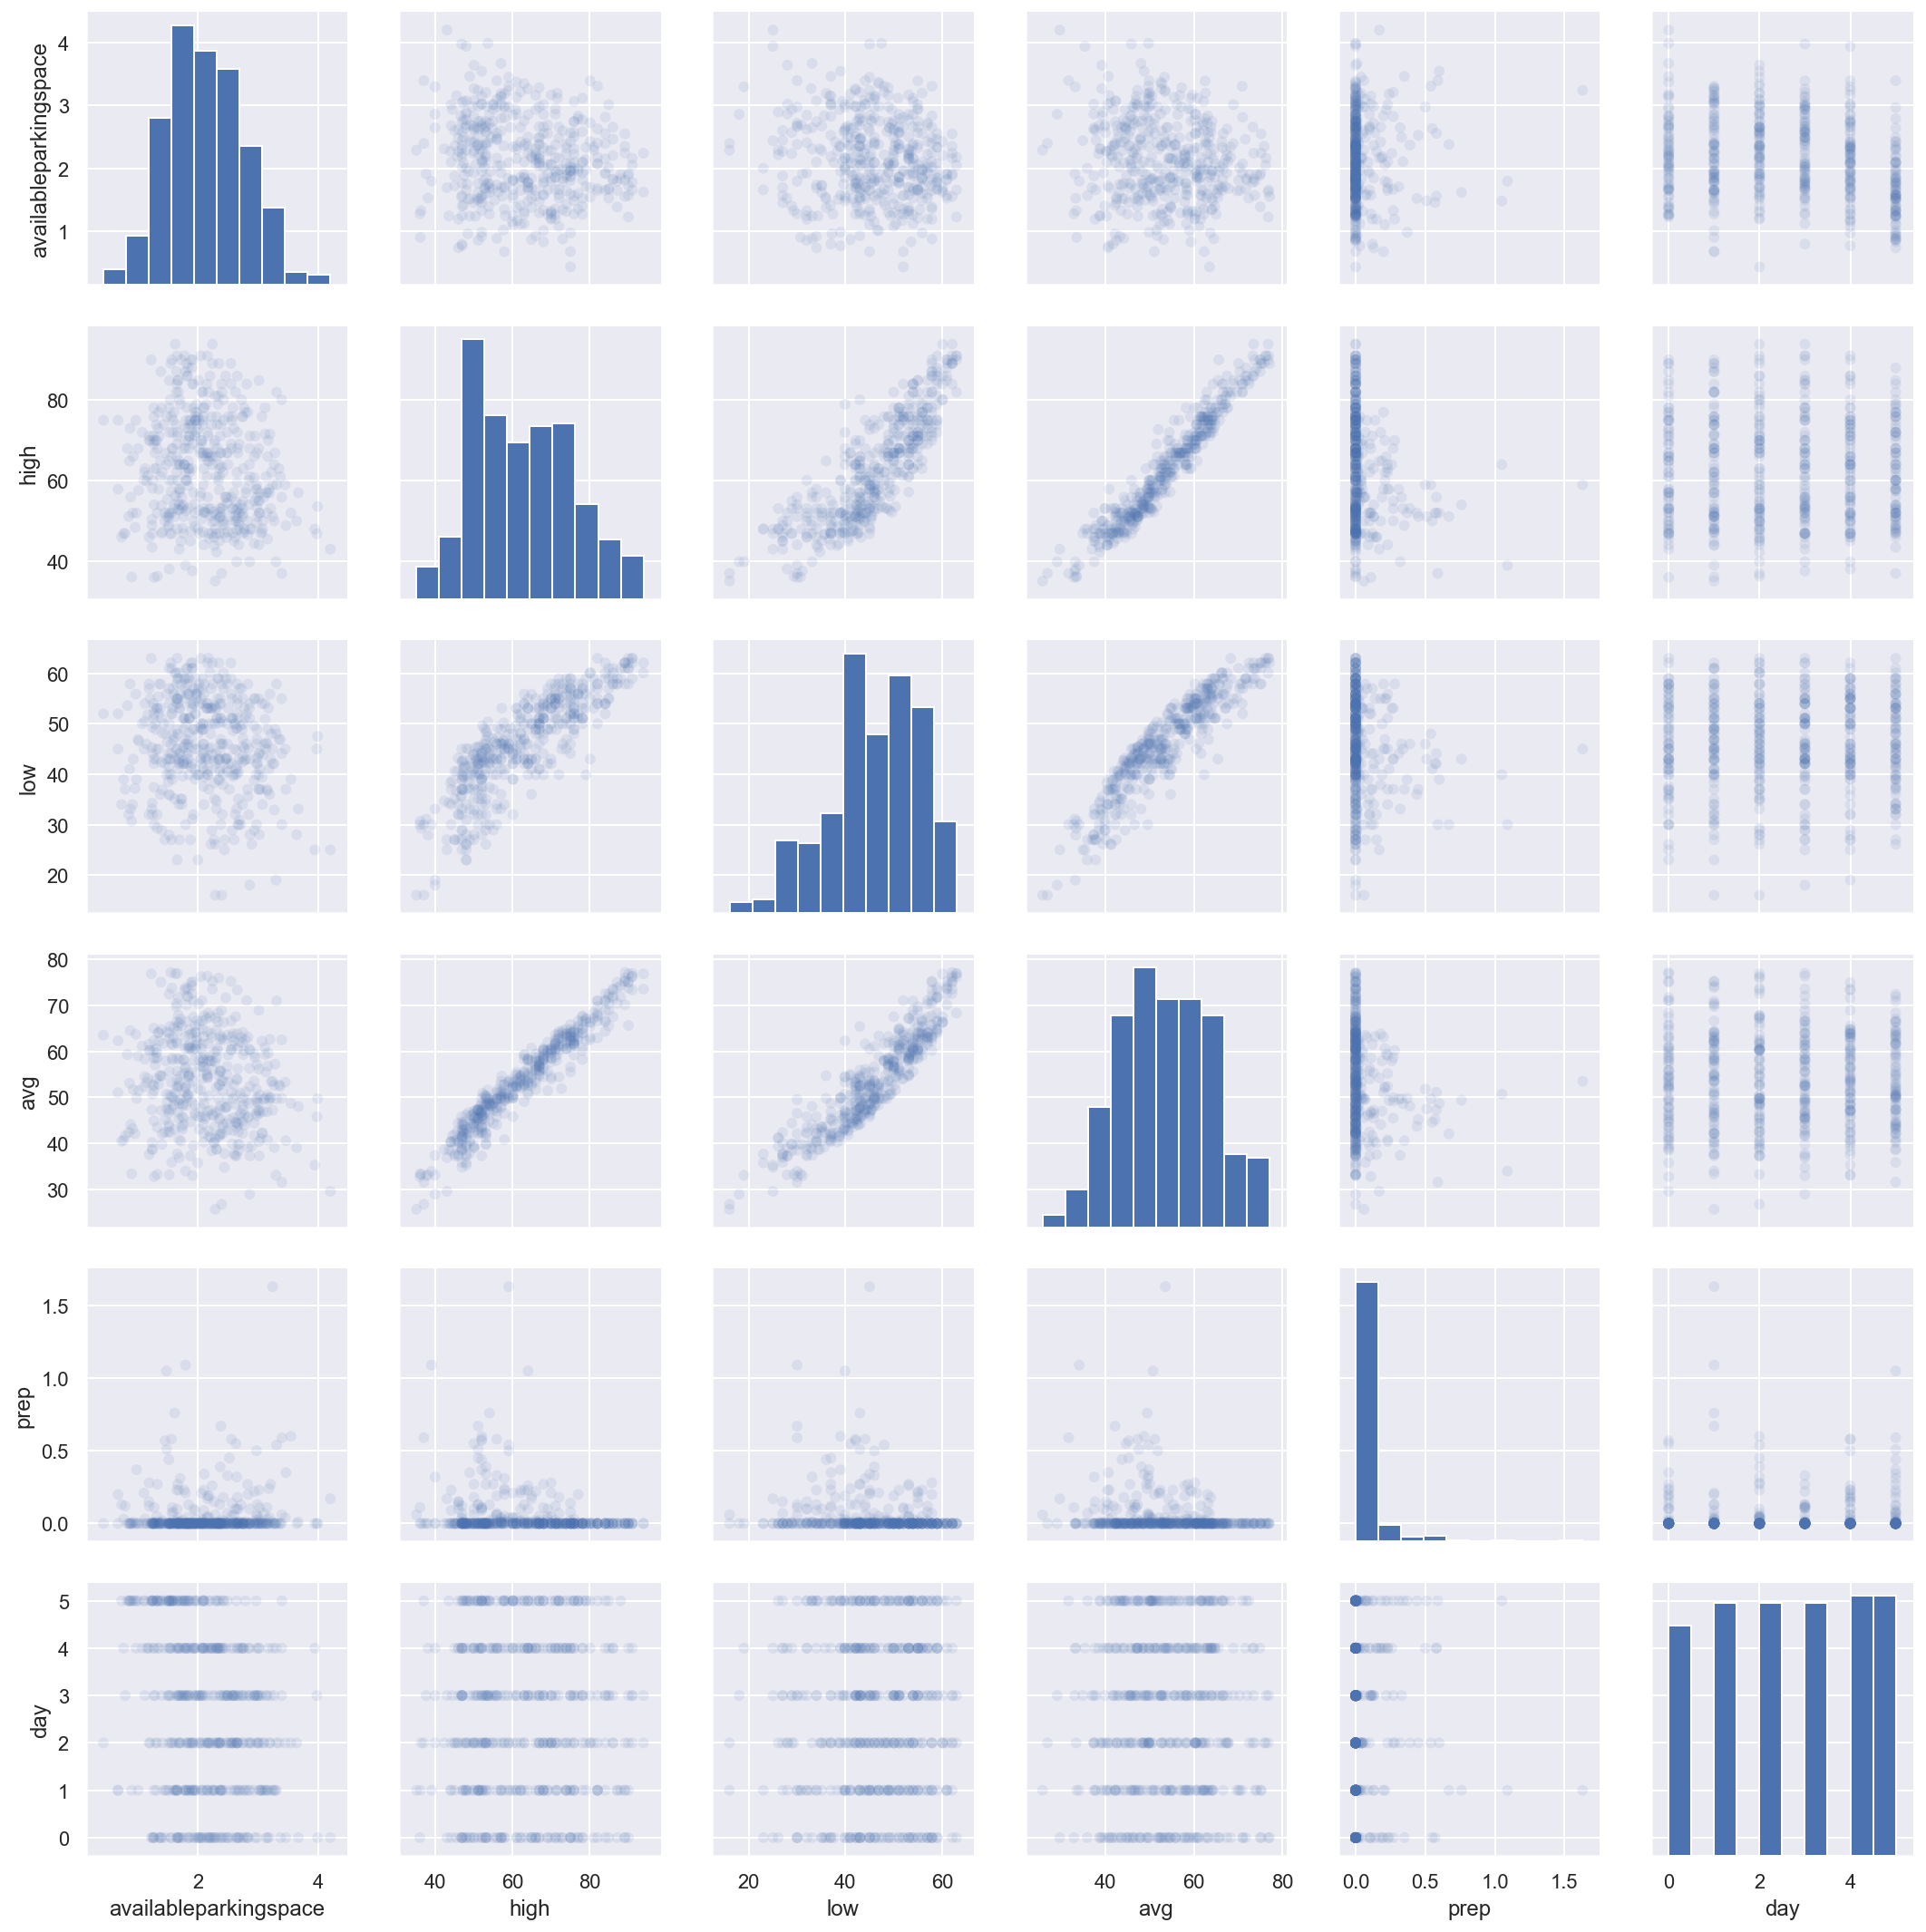

In [70]:
sns.pairplot(test2, plot_kws=dict(alpha=0.1, edgecolor='none'))

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  

In [76]:
x = test2.loc[:, ['high', 'low', 'avg', 'prep', 'day']].values.reshape(-1,5)
y = test2.loc[:,'availableparkingspace']

linreg_model = LinearRegression()
linreg_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
import statsmodels.api as sm

model = sm.OLS(y, x, data=small_df)

test_result = model.fit()
test_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     availableparkingspace   R-squared:                       0.872
Model:                               OLS   Adj. R-squared:                  0.870
Method:                    Least Squares   F-statistic:                     615.9
Date:                   Wed, 17 Jul 2019   Prob (F-statistic):          1.08e-199
Time:                           17:11:41   Log-Likelihood:                -549.41
No. Observations:                    459   AIC:                             1109.
Df Residuals:                        454   BIC:                             1129.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0239      0.013     -1.878      0.061      -0.049       0.001
x2            -0.0030      0.011     -0.264      0.792      -0.026       0.020
x3             0.0687      0.021      3.214      0.001       0.027       0.111
x4             0.8850      0.249      3.557      0.000       0.396       1.374
x5            -0.0158      0.021     -0.736      0.462      -0.058       0.026
==============================================================================
Omnibus:                        9.445   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.685
Skew:                           0.356   Prob(JB):                      0.00789
Kurtosis:                       2.984   Cond. No.                         637.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""